In [111]:
import pandas as pd 
import numpy as np
import os 
import time
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
os.listdir()
data=pd.read_csv("usdtrytrading.txt",sep="\t")
print(data.shape)
data=data.dropna()
# data=data[data.Volume>0]
print(data.iloc[:,6])

(11039, 7)
0        0.000000e+00
1        2.250000e+06
2        1.500000e+06
3        7.500000e+05
4        3.000000e+06
5        7.500000e+05
6        7.500000e+05
7        3.000000e+06
8        1.125000e+07
9        3.750000e+06
10       0.000000e+00
11       7.500000e+05
12       2.250000e+06
13       3.750000e+06
14       3.750000e+06
15       4.500000e+06
16       1.231000e+11
17       1.850000e+10
18       1.110000e+10
19       7.400000e+09
20       3.700000e+09
21       0.000000e+00
22       1.110000e+10
23       0.000000e+00
24       1.110000e+10
25       7.400000e+09
26       1.110000e+10
27       1.110000e+10
28       0.000000e+00
29       3.700000e+09
             ...     
11004    3.954000e+16
11005    8.940000e+15
11006    2.691000e+15
11007    5.132000e+16
11008    7.087000e+11
11009    1.019600e+12
11010    4.708000e+15
11015    4.568900e+04
11016    4.308000e+15
11017    2.319000e+16
11018    2.959000e+16
11019    4.421000e+16
11020    2.397000e+16
11021    4.800000e+01

In [50]:
def replace_with_LWMA(data):
    newData=data.copy()
    for i in range(data.shape[0]-60):
#     for i in range(100):
        for j in range(5):
            window=data.iloc[i:i+60,j+2]
            weight=data.iloc[i:i+60,6]
            weight=weight/np.sum(weight)
            newData.iloc[i+60,j+2]=np.sum(weight*window)
            
#         newData['Open']=data['Open'].rolling(window=60).mean()
#         newData['Close']=data['Close'].rolling(window=60).mean()
#         newData['High']=data['High'].rolling(window=60).mean()
#         newData['Low']=data['Low'].rolling(window=60).mean()
#         newData['Volume']=data['Volume'].rolling(window=60).mean()
#         newData.dropna(inplace=True)
    newData.shape
    return newData

In [ ]:
def replace_with_MA(data):
    newData=data.copy()
    newData['Open']=data['Open'].rolling(window=60).mean()
    newData['Close']=data['Close'].rolling(window=60).mean()
    newData['High']=data['High'].rolling(window=60).mean()
    newData['Low']=data['Low'].rolling(window=60).mean()
    newData['Volume']=data['Volume'].rolling(window=60).mean()
    newData.dropna(inplace=True)
    newData.shape
    return newData

In [94]:
def replace_with_random_sample(data):
    newData=data.copy()
    start_ind=0;
    while start_ind<data.shape[0]-60 :
        a=start_ind+np.random.randint(60)
        for j in range(60):
            newData.iloc[start_ind+j]=newData.iloc[a]
        start_ind=start_ind+60
#         newData['Open']=data['Open'].rolling(window=60).mean()
#         newData['Close']=data['Close'].rolling(window=60).mean()
#         newData['High']=data['High'].rolling(window=60).mean()
#         newData['Low']=data['Low'].rolling(window=60).mean()
#         newData['Volume']=data['Volume'].rolling(window=60).mean()
    newData.dropna(inplace=True)
    newData.shape
    return newData

In [53]:
LWMAData=replace_with_LWMA(data)
print(LWMAData.shape)
LWMAData.tail()

(11032, 7)


,Day,Time,Open,High,Low,Close,Volume
11034,6.05.2019,1554,6.018889,6.019923,6.018335,6.019303,4.129603e+16
11035,6.05.2019,1555,6.018889,6.019923,6.018335,6.019303,4.129604e+16
11036,6.05.2019,1556,6.018861,6.019924,6.018371,6.019385,4.120898e+16
11037,6.05.2019,1557,6.019022,6.020057,6.018514,6.019511,4.115137e+16
11038,6.05.2019,1558,6.019059,6.020085,6.018510,6.019502,4.086056e+16


In [95]:
a=np.random.randint(60)
print(a)
RSData=replace_with_random_sample(data)
RSData.head()

11


,Day,Time,Open,High,Low,Close,Volume
0,29.04.2019,57,5.9429,5.9429,5.9429,5.9429,750000.0
1,29.04.2019,57,5.9429,5.9429,5.9429,5.9429,750000.0
2,29.04.2019,57,5.9429,5.9429,5.9429,5.9429,750000.0
3,29.04.2019,57,5.9429,5.9429,5.9429,5.9429,750000.0
4,29.04.2019,57,5.9429,5.9429,5.9429,5.9429,750000.0


In [101]:
MAData=replace_with_MA(data)
LWMAData=replace_with_LWMA(data)
RSData=replace_with_random_sample(data)

In [102]:
print(RSData.shape)
print(LWMAData.shape)
print(MAData.shape)

(11032, 7)
(11032, 7)
(10973, 7)


In [115]:
def plot_data(data,running_average_window,tit):
    
    fig= plt.figure()
    rolling_mean = data.rolling(window=running_average_window).mean()
    rolling_mean2 = data.rolling(window=running_average_window).std()
    
#     print(rolling_mean.shape)
    plt.plot(data, label=tit)
#     plt.plot(rolling_mean, label=str(running_average_window)+' Sample Average of Mean', color='orange')
#     plt.plot(rolling_mean2, label=str(running_average_window)+' Minutes Average of Std', color='orange')
#     plt.plot(data, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
    plt.legend(loc='upper left')
    plt.title(tit)
    plt.show()
    
    fig.savefig(tit+".png")

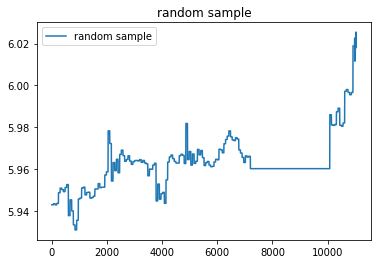

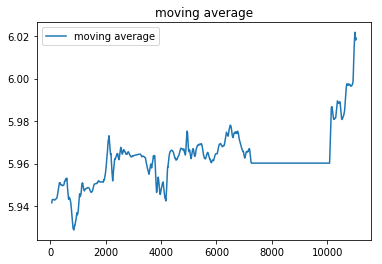

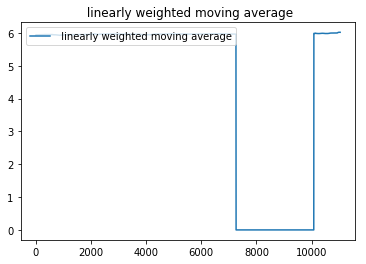

In [116]:
plot_data(RSData['Close'],60,'random sample')
plot_data(MAData['Close'],60,'moving average')
plot_data(LWMAData['Close'],60,' linearly weighted moving average')

In [112]:
import sklearn
def regressionResult(data):
    train_features=data.iloc[:-2,2:]
    train_labels=data.iloc[2:,5]
    test_features=data.iloc[-2:,2:]
    
    regr = linear_model.LinearRegression()
    regr.fit(train_features.fillna(0),train_labels)
    y_pred = regr.predict(train_features.fillna(0))
    MSE=sklearn.metrics.mean_squared_error(train_labels, y_pred)
    print("MSE for OLS is ",str(MSE))

    y_pred=regr.predict(test_features)
    print("Estimations for 15.59 and 16.00 are",y_pred)
    
    reg = linear_model.Ridge(alpha=.5)
    reg.fit(train_features.fillna(0), train_labels)

    # Make predictions using the testing set
    y_pred = reg.predict(train_features.fillna(0))
    MSE=sklearn.metrics.mean_squared_error(train_labels, y_pred)
    print("MSE for Ridge is ",str(MSE))

    y_pred=reg.predict(test_features)
    print("Estimations for 15.59 and 16.00 are",y_pred)
    #     return train_features,train_labels,test_features

In [114]:
print("MAData")
regressionResult(MAData)
print("--------")

print("LWMAData")
regressionResult(LWMAData)
print("--------")

print("RSData")
regressionResult(RSData)
print("--------")

MAData
MSE for OLS is  8.608487867936753e-05
Estimations for 15.59 and 16.00 are [6.00546007 6.00547892]
MSE for Ridge is  1.2209575133841262e-06
Estimations for 15.59 and 16.00 are [6.01762737 6.01763729]
--------
LWMAData
MSE for OLS is  255.19981361896953
Estimations for 15.59 and 16.00 are [-81.15537719 -80.50975272]
MSE for Ridge is  0.012934026923754983
Estimations for 15.59 and 16.00 are [6.02010684 6.02010259]
--------
RSData
MSE for OLS is  0.00012658860312966507
Estimations for 15.59 and 16.00 are [5.9696321 5.9739502]
MSE for Ridge is  1.9189436285304775e-06
Estimations for 15.59 and 16.00 are [6.01644092 6.01513976]
--------
